# Solving Ordinary Differential Equations with the Runge-Kutta Methods 

## List of Problems 

<!-- {#list-of-problems .unnumbered} -->

- [Problem midpoint](#problem_midpoint)

- [Problem tableau](#problem_tableau)

- [Problem Runge Kutta4](#problemrk4)

- [Problem embedded](#problem_embedded)

- [Problem coding A](#prob_a)

- [Problem coding B](#prob_b)

- [Problem coding C](#prob_c)


**Assignment: see canvas for the problems you should hand-in.**

## Objectives

In this lab, you will explore Runge-Kutta methods for solving ordinary
differential equations. The goal is to gain a better understanding of
some of the more popular Runge-Kutta methods and the corresponding
numerical code.

Specifically you will be able to:

-   describe the mid-point method

-   construct a Runge-Kutta tableau from equations or equations from a
    tableau

-   describe how a Runge-Kutta method estimates truncation error

-   edit a working Octave code to use a different method or solve a
    different problem

## Readings


There is no required reading for this lab, beyond the contents of the
lab itself. However, if you would like additional background on any of
the following topics, then refer to the sections indicated below.

**Runge-Kutta Methods:**

    -   Newman, Chapter 8

    -   Press, et al.  Section 16.1

    -   Burden & Faires  Section 5.4
    

## Introduction

Ordinary differential equations (ODEs) arise in many physical situations. For example, there is the first-order Newton cooling equation discussed in Lab 1, and perhaps the most famous equation of all, the second-order Newton’s Second Law of Mechanics $F=ma$ .

In general, higher-order equations, such as Newton’s force equation, can be rewritten as a system of first-order equations . So the generic problem in ODEs is a set of N coupled first-order differential equations of the form, 

$$
  \frac{d{\bf y}}{dt} = f({\bf y},t)
$$ 
  
where ${\bf y}$ is a vector of
variables.

For a complete specification of the solution, boundary conditions for the problem must be given. Typically, the problems are broken up into two classes:

-   **Initial Value Problem (IVP)**: the initial values of
    ${\bf y}$ are specified.

-   **Boundary Value Problem (BVP)**: ${\bf y}$ is
    specified at the initial and final times.

For this lab, we are concerned with the IVP’s. BVP’s tend to be much more difficult to solve and involve techniques which will not be dealt with in this set of labs.

Now as was pointed out in Lab 2, in general, it will not be possible to find exact, analytic solutions to the ODE. However, it is possible to find an approximate solution with a finite difference scheme such as the forward Euler method. This is a simple first-order, one-step scheme which is easy to implement. However, this method is rarely used in practice as it is neither very stable nor accurate.

The higher-order Taylor methods discussed in Lab 2 are one alternative but involve higher-order derivatives that must be calculated by hand or worked out numerically in a multi-step scheme. Like the forward Euler method, stability is a concern.

The Runge-Kutta methods are higher-order, one-step schemes that make use of information at different <span>*stages*</span> between the beginning and end of a step. They are more stable and accurate than the forward Euler method and are still relatively simple compared to schemes such as the multi-step predictor-corrector methods or the Bulirsch-Stoer method. Though they lack the accuracy and efficiency of these more sophisticated schemes, they are still powerful methods that almost always succeed for non-stiff IVPs.

## Runge-Kutta methods

### The Midpoint Method: A Two-Stage Runge-Kutta Method 

The forward Euler method takes the solution at time $t_n$ and advances
it to time $t_{n+1}$ using the value of the derivative $f(y_n,t_n)$ at
time $t_n$ 

$$y_{n+1} = y_n + h f(y_n,t_n)$$ 

where $h \equiv \Delta t$.

![fig1](images/euler.png)

Figure Euler: The forward Euler method is essentially a straight-line approximation to the solution, over the interval of one step, using the derivative at the starting point as the slope. 

The idea of the Runge-Kutta schemes is to take advantage of derivative information at the times between $t_n$ and $t_{n+1}$ to increase the order of accuracy.

For example, in the midpoint method, the derivative at the initial time is used to approximate the derivative at the midpoint of the interval, $f(y_n+\frac{1}{2}hf(y_n,t_n), t_n+\frac{1}{2}h)$. The derivative at the midpoint is then used to advance the solution to the next step. 

The method can be written in two *stages* $k_i$,

<div id="eq:midpoint"><b>eq:midpoint</b></div>
$$
\begin{aligned}
   \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{1}{2}k_1, t_n+\frac{1}{2}h)\\
    y_{n+1} = y_n + k_2
  \end{array}
\end{aligned}
$$ 

The midpoint method is known as a 2-stage Runge-Kutta formula.



![fig2](images/midpoint.png)

Figure midpoint: The midpoint method again uses the derivative at the starting point to
approximate the solution at the midpoint. The derivative at the midpoint
is then used as the slope of the straight-line approximation.

### Second-Order Runge-Kutta Methods

As was shown in Lab 2, the local error in the forward Euler method is proportional to $h^2$. In other words, the forward Euler method has an accuracy which is *first order* in $h$.

The advantage of the midpoint method is that the extra derivative information at the midpoint results in the first order error term cancelling out, making the method *second order* accurate. This can be shown by a Taylor expansion of equation
[eq:midpoint](#eq:midpoint)


<div id='problem_midpoint'><b>Problem midpoint</b></div>

Even though the midpoint method is second-order
accurate, it may still be less accurate than the forward Euler method.
In the demo below, compare the accuracy of the two methods on the
initial value problem 

<div id="eq:linexp"><b>eq:linexp</b></div>
\begin{equation}
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
\end{equation}

which has the exact
solution 
\begin{equation}
y(t) = t + e^{-t}
\end{equation}

1.  Why is it possible that the midpoint method may be less accurate
    than the forward Euler method, even though it is a higher order
    method?

2.  Based on the numerical solutions of [eq:linexp](#eq:linexp), which method
    appears more accurate?

3.  Cut the stepsize in half and check the error at a given time. Repeat
    a couple of more times. How does the error drop relative to the
    change in stepsize?

4.  How do the numerical solutions compare to $y(t) = t + e^{-t}$ when
    you change the initial time? Why?

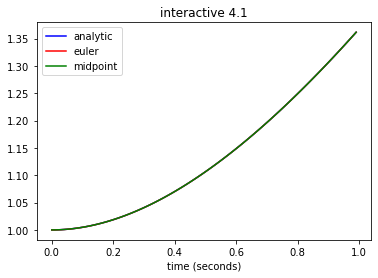

In [5]:
# original demo
import context
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41
import numpy as np
from matplotlib import pyplot as plt

initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.01,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
theAx.legend(loc='best')
theAx.set_title('interactive 4.1');

In general, an *explicit* 2-stage Runge-Kutta method can be
written as



<div id='eq:explicitrk2'><b> eq:explicitrk1</b> </div>

\begin{align}
k_1 =&  h f(y_n,t_n)\\
k_2 =& h f(y_n+b_{21}k_1, t_n+a_2h) \\
y_{n+1} =& y_n + c_1k_1 +c_2k_2
\end{align}

The scheme is said to be <span>*explicit*</span> since a given stage does not depend <span>*implicitly*</span> on itself, as in the backward Euler method, or on a later stage.

Other explicit second-order schemes can be derived by comparing the formula [eq: explicitrk2](#eq:explicitrk2) to the second-order Taylor method and matching terms to determine the coefficients $a_2$, $b_{21}$, $c_1$ and $c_2$.

See [Appendix midpoint](#app_midpoint) for the derivation of the midpoint method.

### The Runge-Kutta Tableau 

A general s-stage Runge-Kutta method can be written as,

$$
\begin{array}{l}
    k_i = h f(y_n+ {\displaystyle \sum_{j=1}^{s} } b_{ij}k_j, t_n+a_ih), 
                                                          \;\;\; i=1,..., s\\
    y_{n+1} = y_n + {\displaystyle \sum_{j=1}^{s}} c_jk_j 
\end{array}
$$


<!-- \label{lab4:eq:rks} -->

An *explicit* Runge-Kutta method has $b_{ij}=0$ for
$i\leq j$, i.e. a given stage $k_i$ does not depend on itself or a later
stage $k_j$.

The coefficients can be expressed in a tabular form known as the
Runge-Kutta tableau. 

$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &  &  && c_i \\ \hline
1 & a_1 & b_{11} & b_{12} & ... & b_{1s} & c_1\\
2 & a_2 & b_{21} & b_{22} & ... & b_{2s} & c_2\\ 
\vdots & \vdots & \vdots & \vdots &  & \vdots & \vdots\\
s &a_s & b_{s1} & b_{s2} & ... & b_{ss} & c_s\\\hline
{j=} & & 1 \  2 & ... & s & \\ \hline
\end{array}
$$


An explicit scheme will be strictly lower-triangular.

For example, a general 2-stage Runge-Kutta method, 


$$
    \begin{array}{l}
    k_1 =  h f(y_n+b_{11}k_1+b_{12}k_2,t_n+a_1h)\\
    k_2 = h f(y_n+b_{21}k_1+b_{22}k_2, t_n+a_2h)\\
    y_{n+1} = y_n + c_1k_1 +c_2k_2
  \end{array}
$$
 
  
  has the coefficients,

$$
\begin{array}{|c|c|cc|c|} \hline
i & a_i & {b_{ij}} & & c_i \\ \hline
1 & a_1 & b_{11} & b_{12}  & c_1\\
2 & a_2 & b_{21} & b_{22}  & c_2\\ \hline
{j=} & & 1 & 2 & \\ \hline
\end{array}
$$

<!-- \label{lab4:eq:rk2} -->

In particular, the midpoint method is given by the tableau,

$$
\begin{array}{|c|c|cc|c|} \hline
i & a_i & {b_{ij}} &   & c_i \\ \hline
1 & 0 & 0 &  0 & 0\\
2 & \frac{1}{2} & \frac{1}{2} & 0 & 1\\ \hline
{j=} & & 1 & 2 & \\ \hline
\end{array}
$$

<div id="problem_tableau"></div>

##### Problem tableau 

Write out the tableau for

1.  [Heun’s method](#eq:heuns)

2.  the fourth-order Runge-Kutta method ([eq:rk4](#eq:rk4)) discussed in the
    next section.

### Explicit Fourth-Order Runge-Kutta Method 

<!-- {#lab4:sec:rk4} -->


Explicit Runge-Kutta methods are popular as each stage can be calculated
with one function evaluation. In contrast, implicit Runge-Kutta methods
usually involves solving a non-linear system of equations in order to
evaluate the stages. As a result, explicit schemes are much less
expensive to implement than implicit schemes.

However, there are cases in which implicit schemes are necessary and
that is in the case of *stiff* sets of equations. See
section 16.6 of Press et al. for a discussion. For these labs, we will
focus on non-stiff equations and on explicit Runge-Kutta methods.

The higher-order Runge-Kutta methods can be derived by in manner similar
to the midpoint formula. An s-stage method is compared to a Taylor
method and the terms are matched up to the desired order.

Methods of order $M > 4$ require $M+1$ or $M+2$ function evaluations or
stages, in the case of explicit Runge-Kutta methods. As a result,
fourth-order Runge-Kutta methods have achieved great popularity over the
years as they require only four function evaluations per step. In
particular, there is the classic fourth-order Runge-Kutta formula:

<div id="eq:rk4"><b>eq:rk4</b><div>

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{k_1}{2}, t_n+\frac{h}{2})\\
    k_3 = h f(y_n+\frac{k_2}{2}, t_n+\frac{h}{2})\\
    k_4 = h f(y_n+k_3, t_n+h)\\
    y_{n+1} = y_n + \frac{k_1}{6}+ \frac{k_2}{3}+ \frac{k_3}{3} + \frac{k_4}{6}
  \end{array}
$$



<div id="problemrk4"><b>Problem RK4</b>
    
In the cell below, compare compare solutions to the test
problem

<div id="eq:test"><b>eq:test</b><div>
$$
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
$$ 

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.

1.  Based on the numerical solutions of ([eq:test](#eq:test)), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

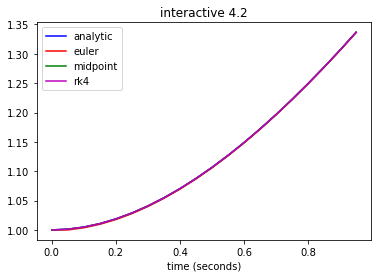

In [7]:
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2');

### Embedded Runge-Kutta Methods: Estimate of the Truncation Error 

<!-- {#lab4:sec:embeddedrk} -->

It is possible to find two methods of different order which share the
same stages $k_i$ and differ only in the way they are combined, i.e. the
coefficients $c_i$. For example, the original so-called embedded
Runge-Kutta scheme was discovered by Fehlberg and consisted of a
fourth-order scheme and fifth-order scheme which shared the same six
stages.

In general, a fourth-order scheme embedded in a fifth-order scheme will
share the stages 

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+b_{21}k_1, t_n+a_2h)\\
    \vdots \\
    k_6 = h f(y_n+b_{51}k_1+ ...+b_{56}k_6, t_n+a_6h)
  \end{array}
$$

 <!-- \label{lab4:eq:stages} -->

<!-- \label{lab4:eq:fifth} -->


The fifth-order formula takes the step: 

$$
  y_{n+1}=y_n+c_1k_1+c_2k_2+c_3k_3+c_4k_4+c_5k_5+c_6k_6
$$ 

while the
embedded fourth-order formula takes a different step:

<!-- \label{lab4:eq:fourth} -->

$$
 y_{n+1}^*=y_n+c^*_1k_1+c^*_2k_2+c^*_3k_3+c^*_4k_4+c^*_5k_5+c^*_6k_6
$$

If we now take the difference between the two numerical estimates, we
get an estimate $\Delta_{\rm spec}$ of the truncation error for the
fourth-order method, 

<!-- \label{lab4:eq:errorest} -->
$$
 \Delta_{\rm est}(i)=y_{n+1}(i) - y_{n+1}^{*}(i) 
= \sum^{6}_{i=1}(c_i-c_{i}^{*})k_i
$$ 

This will prove to be very useful
in the next lab where we provide the Runge-Kutta algorithms with
adaptive stepsize control. The error estimate is used as a guide to an
appropriate choice of stepsize.

An example of an embedded Runge-Kutta scheme was found by Cash and Karp
and has the tableau: 

$$
\begin{array}{|c|c|cccccc|c|c|} \hline
i & a_i & {b_{ij}} & & & & &  & c_i & c^*_i \\ \hline
1 &  &  &  &  & &  &  & \frac{37}{378} & \frac{2825}{27648}\\
2 & \frac{1}{5} & \frac{1}{5}&  &  & &  & & 0 &0 \\
3 & \frac{3}{10} & \frac{3}{40}&\frac{9}{40}&  & & &  &\frac{250}{621}&\frac{18575}{48384}\\
4 &  \frac{3}{5}&\frac{3}{10}& -\frac{9}{10}&\frac{6}{5}& & &  &\frac{125}{594}& \frac{13525}{55296}\\
5 & 1 & -\frac{11}{54}&\frac{5}{2}&-\frac{70}{27}&\frac{35}{27}&  &  & 0 & \frac{277}{14336}\\
6 &  \frac{7}{8}&  \frac{1631}{55296}&  \frac{175}{512}&\frac{575}{13824}& \frac{44275}{110592}& \frac{253}{4096}&  & \frac{512}{1771} & \frac{1}{4}\\\hline
{j=} & & 1 & 2 & 3 & 4 & 5 & 6 & & \\ \hline
\end{array}
$$

<a name="problem_embedded"></a>

##### Problem embedded

Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem
[eq:test2](#eq:test2]) 

<div id="eq:test2"><b>eq:test2</b></div>
$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$

generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes. 

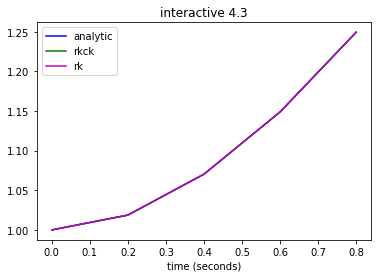

In [8]:
import numpy as np
from matplotlib import pyplot as plt

from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
l3=theAx.plot(timeVec,yrk,'m-',label='rk')
theAx.legend(loc='best')
theAx.set_title('interactive 4.3');

## Python: moving from a notebook to a library

### Managing problem configurations

So far we've hardcoded our initialVars file into a cell.  We need a strategy for saving
this information into a file that we can keep track of using git, and modify for
various runs.  In python the fundamental data type is the dictionary.  It's very
flexible, but that comes at a cost -- there are other data structures that are better
suited to storing this type of information.

##### Mutable vs. immutable data types

Python dictionaries and lists are **mutable**, which means they can be modified after they
are created.  Python tuples, on the other hand, are **immutable** -- there is no way of changing
them without creating a copy.  Why does this matter?  One reason is efficiency and safety, an
immutable object is easier to reason about.  Another reason is that immutable objects are **hashable**,
that is, they can be turned into a unique string that can be guaranteed to represent that exact
instance of the datatype.  Hashable data structures can be used as dictionary keys, mutable
data structures can't.  Here's an illustration -- this cell works:

In [9]:
test_dict=dict()
the_key = (0,1,2,3) # this is a tuple, i.e. immutable - it uses curved parentheses ()
test_dict[the_key]=5
print(test_dict)

{(0, 1, 2, 3): 5}


this cell fails:

In [10]:
import traceback, sys
test_dict=dict()
the_key = [0,1,2,3] # this is a list - it uses square parentheses []
try:
    test_dict[the_key]=5
except TypeError as e:
    tb = sys.exc_info()
    traceback.print_exception(*tb)

Traceback (most recent call last):
  File "C:\Users\megan\AppData\Local\Temp/ipykernel_15340/1458084229.py", line 5, in <module>
    test_dict[the_key]=5
TypeError: unhashable type: 'list'


#### Named tuples

One particular tuple flavor that bridges the gap between tuples and dictionaries
is the [namedtuple](https://docs.python.org/3/library/collections.html#collections.namedtuple).
It has the ability to look up values by attribute instead of numerical index (unlike
a tuple), but it's immutable and so can be used as a dictionary key.  The cell
below show how to convert from a dictionary to a namedtuple for our case:

In [11]:
from collections import namedtuple
initialDict={'yinitial': 1,'t_beg':0.,'t_end':1.,
                    'dt':0.2,'c1':-1.,'c2':1.,'c3':1.}     
inittup=namedtuple('inittup','dt c1 c2 c3 t_beg t_end yinitial')
initialCond=inittup(**initialDict)
print(f"values are {initialCond.c1} and {initialCond.yinitial}")

values are -1.0 and 1


Comment on the cell above:

1) `inittup=namedtuple('inittup','dt c1 c2 c3 t_beg t_end yinitial')`
   creats a new data type with a type name (inittup) and properties
   (the attributes we wlll need like dt, c1 etc.)
   
2) `initialCond=inittup(**initialDict)`
   uses "keyword expansion" via the "doublesplat" operator `**` to expand
   the initialDict into a set of key=value pairs for the inittup constructor
   which makes an instance of our new datatype called initialCond
   
3) we access these readonly members of the instance using attributes like this:
   `newc1 = initialCond.c1`

   
Note the other big benefit for namedtuples -- "initialCond.c1" is self-documenting,
you don't have to explain that the tuple value initialCond[3]  holds c1,
and you never have to worry about changes to  the order of the tuple changing the 
results of your code.

### Saving named tuples to a file

One drawback to namedtuples is that there's no one annointed way to **serialize** them
i.e. we are in charge of trying to figure out how to write our namedtuple out
to a file for future use.  Contrast this with lists, strings, and scalar numbers and
dictionaries, which all have a builtin **json** representation in text form.

So here's how to turn our named tuple back into a dictionary:


In [12]:
#
# make the named tuple a dictionary
#
initialDict = initialCond._asdict()
print(initialDict)

{'dt': 0.2, 'c1': -1.0, 'c2': 1.0, 'c3': 1.0, 't_beg': 0.0, 't_end': 1.0, 'yinitial': 1}


Why does `_asdict` start with an underscore?  It's to keep the fundamental
methods and attributes of the namedtuple class separate from the attributes
we added when we created the new `inittup` class. For more information, see
the [collections docs](https://docs.python.org/3/library/collections.html#module-collections)

In [8]:
outputDict = dict(initialconds = initialDict)
import json
outputDict['history'] = 'written Jan. 28, 2020'
outputDict['plot_title'] = 'simple damped oscillator run 1'
with open('run1.json', 'w') as jsonout:
    json.dump(outputDict,jsonout,indent=4)

After running this cell, you should see the following [json output](https://en.wikipedia.org/wiki/JSON) in the file `run1.json`:

```
{
    "initialconds": {
        "dt": 0.2,
        "c1": -1.0,
        "c2": 1.0,
        "c3": 1.0,
        "t_beg": 0.0,
        "t_end": 1.0,
        "yinitial": 1
    },
    "history": "written Jan. 28, 2020",
    "plot_title": "simple damped oscillator run 1"
}
```

### Reading a json file back into python

To recover your conditions read the file back in as a dictionary:


In [9]:
with open("run1.json",'r') as jsonin:
    inputDict = json.load(jsonin)
initial_conds = inittup(**inputDict['initialconds'])
print(f"values are {initial_conds.c1} and {initial_conds.yinitial}")

values are -1.0 and 1


### Passing a derivative function to an integrator

In python, functions are first class objects, which means you can pass them around like any
other datatype, no need to get function handles as in matlab or Fortran.  The integrators
in [do_example.py](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab4/do_example.py)
have been written to accept a derivative function of the form:

```python
    def derivs4(coeff, y):
```

i.e. as long as the derivative can be written in terms of coefficients
and the previous value of y, the integrator will move the ode ahead one
timestep.  If we wanted coefficients that were a function of time, we would
need to also include those functions the coeff namedtuple, and add keep track of the
timestep through the integration.

Here's an example using forward euler to integrate the harmonic oscillator

Note that you can also run this from the terminal by doing:

```
cd numlabs/lab4/example
python do_example.py
```

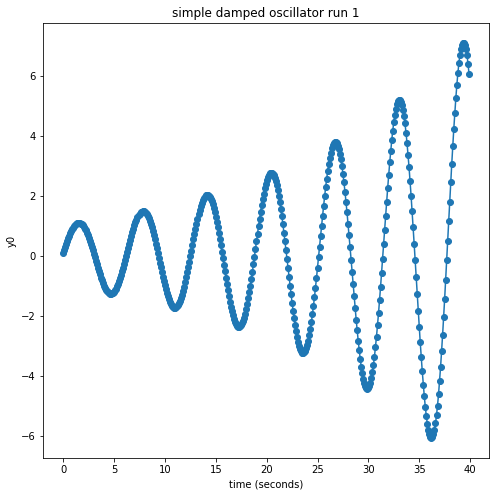

In [10]:
import json
from numlabs.lab4.example.do_example import get_init, euler4
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivative
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f
#
# first make sure we have an input file in this directory
#

coeff=get_init()

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=euler4(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');



<div id="prob_a"></div>

##### problem coding A



As set up above, do_example.py
solves the damped, harmonic oscillator with the (unstable) forward Euler method.

1.  Write a new routine that solves the harmonic oscilator using [Heun’s method](#eq:heuns)
    along the lines of the routines in [lab4_functions.py](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab4/lab4_functions.py)

    Hand in a fresh notebook with the code and a plot.


##### problem coding B

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. 
    
    $$f(y,t) = t - y  + 1.0$$ 
    
    Choose two sets
    of initial conditions and determine if 
    there is any difference between the two methods when applied to
    either problem. Should there be? Explain by analyzing the steps
    that each method is taking.
    
2. Add your answer as new cells to the problem A notebook


##### problem coding C

1.  Solve the Newtonian cooling equation of lab 1 by any of the above
    methods. 

2.  Add cells that do this and also generate some plots, showing your along with the parameter values and
    initial conditions.

##  Mathematical Notes 

<!-- {#lab4:ap:mathnote} -->


<!--  {#lab4:ap:midpointderiv} -->

### Note on the Derivation of the Second-Order Runge-Kutta Methods

A general s-stage Runge-Kutta method can be written as,


$$
  \begin{array}{l}
    k_i = h f(y_n+ {\displaystyle \sum_{j=1}^{s} } b_{ij}k_j, t_n+a_ih), 
                                                          \;\;\; i=1,..., s\\
    y_{n+1} = y_n + {\displaystyle \sum_{j=1}^{s}} c_jk_j 
\end{array}
$$ 
  
  where

${\displaystyle \sum_{j=1}^{s} } b_{ij} = a_i$.

In particular, an *explicit* 2-stage Runge-Kutta method can be written as, 

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+ak_1, t_n+ah)\\
    y_{n+1} = y_n + c_1k_1 +c_2k_2
  \end{array}
$$

where 
 
$b_{21} = a_2 \equiv a$. 
  
So we want to know what values of $a$, $c_1$ and $c_2$ leads to a second-order method, i.e. a method with an error proportional to $h^3$.

To find out, we compare the method against a second-order Taylor expansion,

<!-- \label{lab4:eq:taylor} -->

$$
  y(t_n+h) = y(t_n) + hy^\prime(t_n) + \frac{h^2}{2}y^{\prime \prime}(t_n)
             + O(h^3)
$$

So for the $y_{n+1}$ to be second-order accurate, it must match the Taylor method. In other words, $c_1k_1 +c_2k_2$ must match $hy^\prime(t_n) + \frac{h^2}{2}y^{\prime \prime}$. To do this, we need to express $k_1$ and $k_2$ in terms of derivatives of $y$ at time $t_n$.

First note, $k_1 = hf(y_n, t_n) = hy^\prime(t_n)$.

Next, we can expand $k_2$ about $(y_n.t_n)$, 

<!-- \label{lab4:eq:k1} -->

$$
k_2 = hf(y_n+ak_1, t_n+ah) = h(f + haf_t + haf_yy^\prime + O(h^2))
$$

<!-- \label{lab4:eq:secder} -->

However, we can write $y^{\prime \prime}$ as, 

$$
  y^{\prime \prime} = \frac{df}{dt} = f_t + f_yy^\prime
$$ 
This allows us
to rewrite $k_2$ in terms of $y^{\prime \prime}$,

$$k_2 = h(y^\prime +  hay^{\prime \prime}+ O(h^2))$$

Substituting these expressions for $k_i$ back into the Runge-Kutta formula gives us,
$$y_{n+1} = y_n + c_1hy^\prime +c_2h(y^\prime +  hay^{\prime \prime})$$
or 
$$y_{n+1} = y_n + h(c_1 +c_2)y^\prime +  h^2(c_2a)y^{\prime \prime}$$

If we compare this against the second-order Taylor method, we see that we need, 


$$
   \begin{array}{l}
  c_1 + c_2 = 1\\
  a c_2 = \frac{1}{2}
   \end{array}
$$
   
for the Runge-Kutta method to be
second-order.

<div id="app_midpoint"></div>
If we choose $a = 1/2$, this implies $c_2 = 1$ and $c_1=0$. This gives us the midpoint method.

However, note that other choices are possible. In fact, we have a *one-parameter family* of second-order methods. For example if we choose, $a=1$ and $c_1=c_2=\frac{1}{2}$, we get the *modified Euler method*,

<!-- \label{lab4:eq:modifiedeuler} -->


$$
    \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+k_1, t_n+h)\\
    y_{n+1} = y_n + \frac{1}{2}(k_1 +k_2)
  \end{array}
$$
    
while the choice
$a=\frac{2}{3}$, $c_1=\frac{1}{4}$ and $c_2=\frac{3}{4}$, gives us




<div id="eq:heuns"><b>Heun's Method</b></div>

$$
  \begin{array}{l}
    k_1 =  h f(y_n,t_n)\\
    k_2 = h f(y_n+\frac{2}{3}k_1, t_n+\frac{2}{3}h)\\
    y_{n+1} = y_n + \frac{1}{4}k_1 + \frac{3}{4}k_2
  \end{array}
$$

## Glossary 


- **driver**  A routine that calls the other routines to solve the
  problem.

- **embedded Runge-Kutta methods**:  Two Runge-Kutta
  methods that share the same stages. The difference between the solutions
  give an estimate of the local truncation error.

- **explicit**  In an explicit numerical scheme, the calculation of the solution at a given
  step or stage does not depend on the value of the solution at that step
  or on a later step or stage.
              
- **fourth-order Runge-Kutta method**  A popular fourth-order, four-stage, explicit Runge-Kutta
  method.

- **implicit**: In an implicit numerical scheme, the
  calculation of the solution at a given step or stage does depend on the
  value of the solution at that step or on a later step or stage. Such
  methods are usually more expensive than implicit schemes but are better
  for handling stiff ODEs.

- **midpoint method** :  A two-stage,
  second-order Runge-Kutta method.

- **stages**:  The approximations
  to the derivative made in a Runge-Kutta method between the start and end
  of a step.

- **tableau**  The tableau for a Runge-Kutta method
  organizes the coefficients for the method in tabular form.

